# Исследовательский анализ данных

## Импорт модулей

In [1]:
import pandas as pd

from comp_ds_prj.visualization import review_data, count_vals

%matplotlib inline

## Знакомство с данными

### Вывод общей информации о датафрейме

#### `car_train.csv`

Рассмотрим таблицу `car_train.csv`, содержащую описания машин и информацию о
поломках.

В данных
строк: 2337
столбцов: 10

Первые 10 строк таблицы:


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel
5,b12101843B,Skoda Rapid,economy,petrol,2.36,2013,42176,2018,50.93,engine_ignition
6,Q-9368117S,Nissan Qashqai,standart,petrol,5.32,2012,24611,2014,54.79,engine_overheat
7,O-2124190y,Tesla Model 3,premium,electro,3.90,2017,116872,2019,50.26,gear_stick
8,h16895544p,Kia Sportage,standart,petrol,3.50,2014,56384,2017,33.24,gear_stick
9,K77009462l,Smart ForFour,economy,petrol,4.56,2013,41309,2018,39.43,gear_stick



Общая информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_id         2337 non-null   object 
 1   model          2337 non-null   object 
 2   car_type       2337 non-null   object 
 3   fuel_type      2337 non-null   object 
 4   car_rating     2337 non-null   float64
 5   year_to_start  2337 non-null   int64  
 6   riders         2337 non-null   int64  
 7   year_to_work   2337 non-null   int64  
 8   target_reg     2337 non-null   float64
 9   target_class   2337 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 182.7+ KB

Доля пропусков в каждом признаке:


car_id           0.0
model            0.0
car_type         0.0
fuel_type        0.0
car_rating       0.0
year_to_start    0.0
riders           0.0
year_to_work     0.0
target_reg       0.0
target_class     0.0
dtype: float64

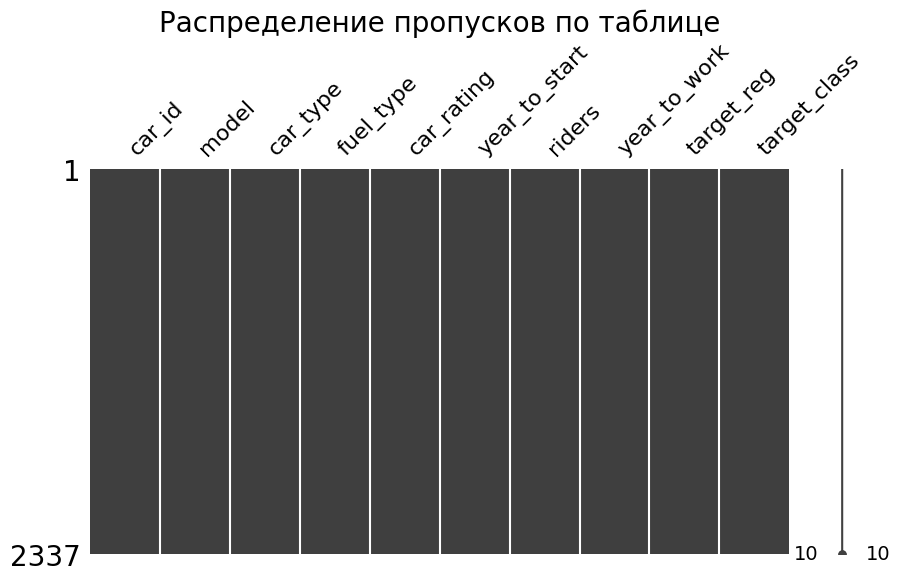

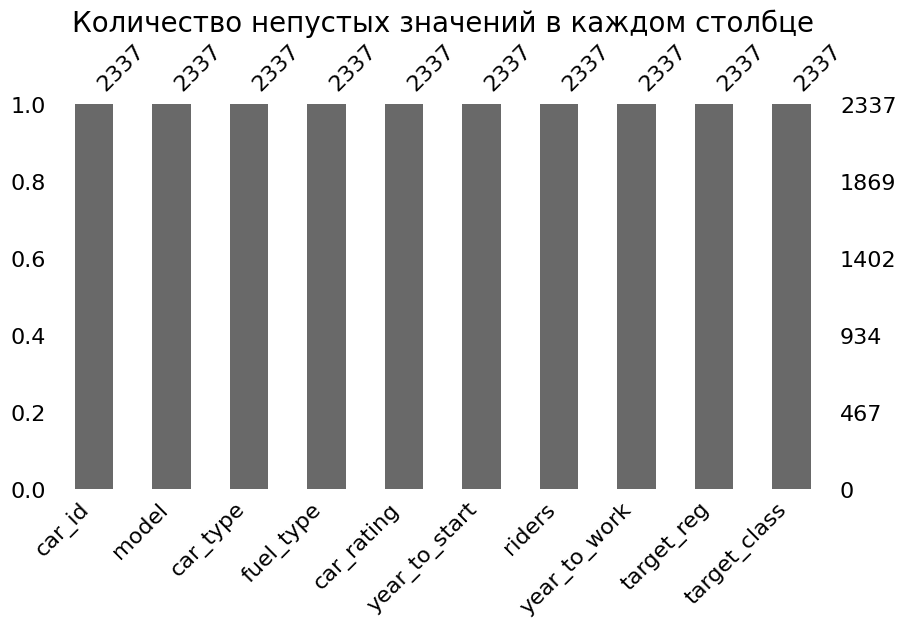

Описательные статистики для числовых признаков:


,count,mean,std,min,10%,25%,50%,75%,90%,max
car_rating,2337.0,4.354292,0.996954,0.98,3.072,3.74,4.36,5.00,5.600,8.90
year_to_start,2337.0,2014.040650,1.685852,2011.00,2012.000,2013.00,2014.00,2015.00,2016.400,2017.00
riders,2337.0,63711.443731,33755.012096,23.00,19583.600,41053.00,64415.00,86515.00,110536.200,142862.00
year_to_work,2337.0,2018.069748,2.159484,2014.00,2015.000,2016.00,2018.00,2020.00,2021.000,2022.00
target_reg,2337.0,44.946735,17.579568,18.92,26.966,31.67,40.17,54.79,67.068,141.63


Описательные статистики для категориальных признаков:


,count,unique,top,freq
car_id,2337,2337,y13744087j,1
model,2337,26,Hyundai Solaris,161
car_type,2337,4,economy,1536
fuel_type,2337,2,petrol,2289
target_class,2337,9,engine_overheat,289



Дубликаты не обнаружены.

Количество повторений значения признака year_to_start


,Значение признака year_to_start,Количество повторений
0,2015,604
1,2014,451
2,2013,433
3,2012,242
4,2017,234
5,2011,208
6,2016,165


Количество повторений значения признака year_to_work


,Значение признака year_to_work,Количество повторений
0,2019,346
1,2018,337
2,2020,336
3,2016,331
4,2017,320
5,2021,228
6,2015,215
7,2022,123
8,2014,101


In [2]:
car_train = pd.read_csv(
    "./data/raw/car_train.csv"
)

review_data(car_train)
print()

count_vals(car_train, "year_to_start")

count_vals(car_train, "year_to_work")

**Выводы:**
1. Таблица не содержит пропусков.
2. Признак `car_id ` - **id автомобиля**, содержащий уникальное значение для
каждой записи.
3. Присутствует категориальный признак с высокой кардинальностью - `model`.
4. `target_reg` - целевой признак, содержащий количество дней до поломки, указан
с дробной частью. Поставлена задача регрессии.
5. `target_class` - целевой признак, содержащий 9 классов поломок, т.е.
поставлена кроме задачи регрессии поставлена задача многоклассовой
классификации.

#### `driver_info.csv`

Рассмотрим таблицу `driver_info.csv`, содержащую информацию о водителях.

В данных
строк: 15153
столбцов: 7

Первые 10 строк таблицы:


,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.0,865,19.0,l17437965W,1,2019-4-2
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19
2,59,7.8,947,4.0,g11098715c,0,2021-1-15
3,37,7.0,18,4.0,U12618125q,0,2019-11-20
4,39,8.2,428,7.0,A14375829B,0,2019-7-23
5,21,9.9,831,22.0,L95976611S,1,2020-9-18
6,39,6.9,2293,5.0,z74338505G,0,2022-3-30
7,26,7.9,142,5.0,q11106749z,1,2019-12-22
8,18,9.3,425,18.0,r77865210A,1,2020-6-4
9,23,9.2,601,12.0,t10928335r,1,2020-7-18



Общая информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15153 entries, 0 to 15152
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 15153 non-null  int64  
 1   user_rating         15153 non-null  float64
 2   user_rides          15153 non-null  int64  
 3   user_time_accident  14182 non-null  float64
 4   user_id             15153 non-null  object 
 5   sex                 15153 non-null  int64  
 6   first_ride_date     15153 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 828.8+ KB

Доля пропусков в каждом признаке:


age                   0.00
user_rating           0.00
user_rides            0.00
user_time_accident    0.06
user_id               0.00
sex                   0.00
first_ride_date       0.00
dtype: float64

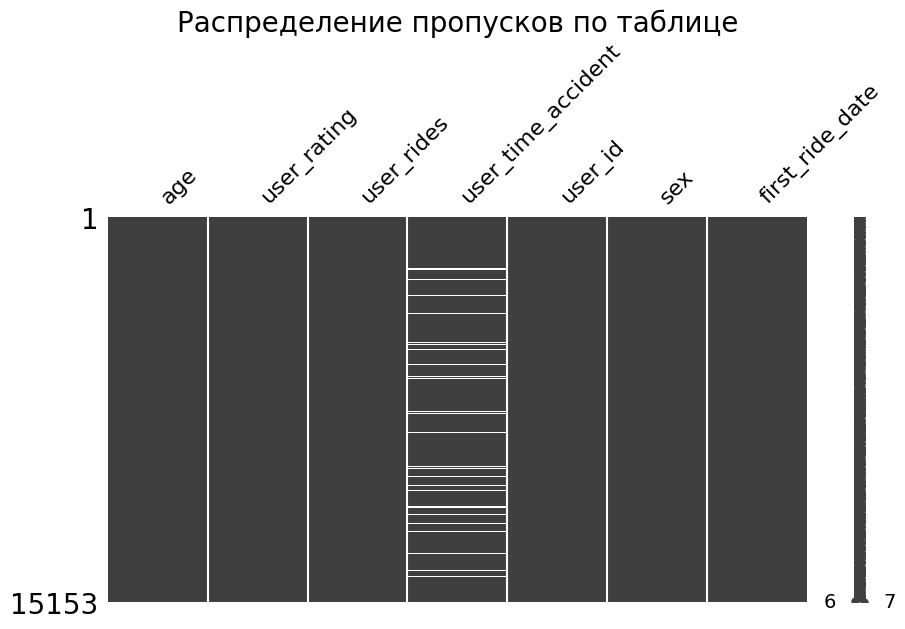

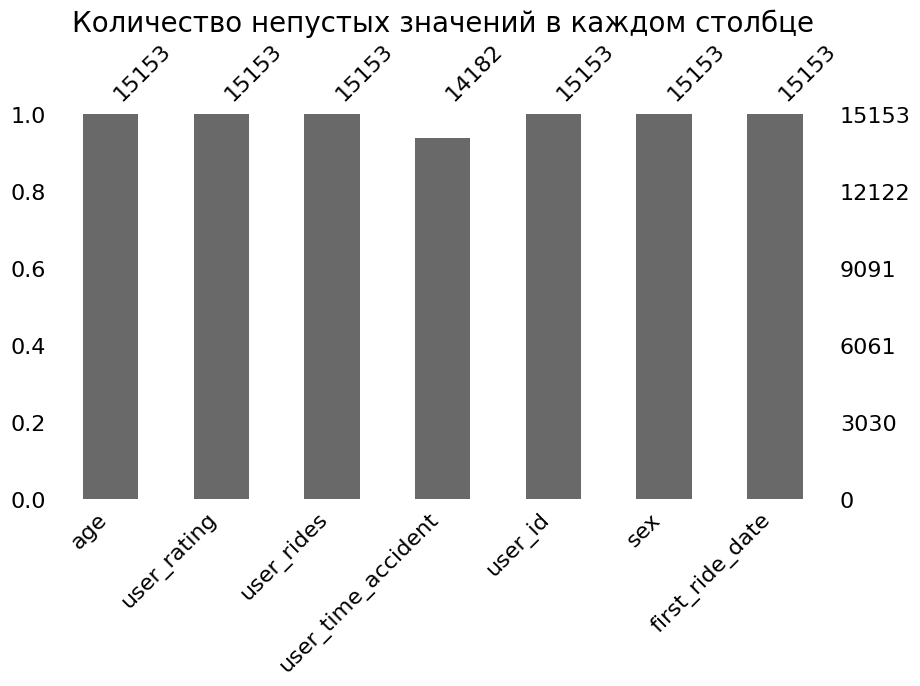

Описательные статистики для числовых признаков:


,count,mean,std,min,10%,25%,50%,75%,90%,max
age,15153.0,33.581073,9.919271,18.0,20.0,25.0,33.0,41.0,47.0,63.0
user_rating,15153.0,8.109345,0.668246,5.8,7.2,7.7,8.1,8.6,9.0,10.0
user_rides,15153.0,871.015442,573.512378,0.0,126.0,421.0,876.0,1145.0,1668.0,3316.0
user_time_accident,14182.0,10.129601,8.867482,0.0,1.0,4.0,9.0,14.0,19.0,86.0
sex,15153.0,0.499967,0.500016,0.0,0.0,0.0,0.0,1.0,1.0,1.0


Описательные статистики для категориальных признаков:


,count,unique,top,freq
user_id,15153,15153,l17437965W,1
first_ride_date,15153,1653,2019-1-30,43



Дубликаты не обнаружены.


In [3]:
driver_info = pd.read_csv(
    "./data/raw/driver_info.csv"
)

review_data(driver_info)

**Выводы:**
1. Признак `user_time_accident` содержит около 6% пропущенных значений,
остальные признаки не содержат пропусков. При этом сам признак является
целочисленным, так как содержит количество инцидентов.
1. Признак `user_rating` количественный с плавающей точкой, округлённый до
десятых.
1. Признак `user_rides`, содержит значения равные 0, то есть в таблице
есть пользователи, не совершившие ни одной поездки.
1. Признак `user_id` - **id водителя** целиком состоит из уникальных значений.
1. Признак `Sex` категориальный, но распознан как целочисленный, так как целиком
закодирован нулями и единицами.
1. Для признака `first_ride_date` выведен тип `object`, в то время как он
содержит дату первой поездки каждого водителя и должен иметь тип `datetime`.

### `fix_info`

Рассмотрим таблицу `fix_info`

In [ ]:
fix_info = pd.read_csv(
    "./data/raw/fix_info.csv"
)

review_data(fix_info)

**Выводы:**
1. 
2. 

### `rides_info`

Рассмотрим таблицу `rides_info`

In [ ]:
rides_info = pd.read_csv(
    "./data/raw/rides_info.csv"
)

review_data(rides_info)

**Выводы:**
1. 
2. 